<a href="https://colab.research.google.com/github/dsarj/tcc_previsao_pulsares/blob/main/pulse_star_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
# Lendo arquivo csv tratado
data = files.upload()

Saving pulsar_data_train_clean.csv to pulsar_data_train_clean.csv


In [ ]:
# Obtendo o dataframe do arquivo lido
pulse_star_train = pd.read_csv(next(iter(data.keys())))

ps_df_train = pulse_star_train.copy()

0.0    11375
1.0     1153
Name: target_class, dtype: int64


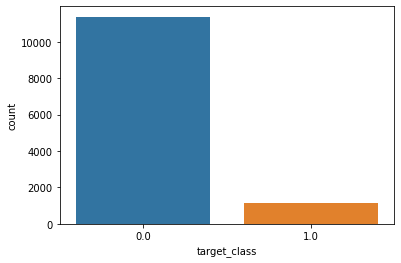

In [ ]:
# Verificando balanceamento das classes
print(ps_df_train.target_class.value_counts())
ax = sns.countplot(x="target_class", data=ps_df_train)

In [ ]:
# Preparando o train test split
X=ps_df_train.drop("target_class",axis=1)
y=ps_df_train["target_class"]


In [ ]:
# Aplicando o SMOTE para balanceamento das classes
smt = SMOTE()
X, y = smt.fit_resample(X, y)

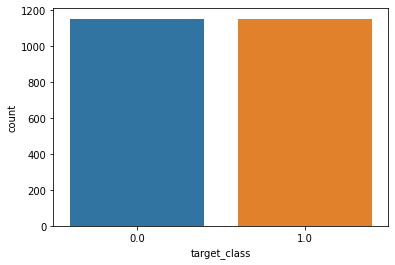

In [ ]:
# Verificando balanceamento após SMOTE
ax = sns.countplot(x=y)

In [ ]:
# Aplicando o train test split com 90% da base para treinamento
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 18, test_size = 0.2, stratify=y)


In [ ]:
# Aplicando standard scaler no modelo
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

train_X = pd.DataFrame(scaler.transform(train_X), index=train_X.index, columns=train_X.columns)
val_X = pd.DataFrame(scaler.transform(val_X), index=val_X.index, columns=val_X.columns)

In [ ]:
# Método que calcula acurácia do RANDOM FOREST REGRESSOR recebendo um n_estimators
def calculateAccuracyRF(num_estimators):
  
  print("N_Estimator: {}".format(num_estimators)) 
  
  forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=18)
  forest_model.fit(train_X, train_y)

  y_pred_train = forest_model.predict(val_X)

  acuracia = accuracy_score(val_y, y_pred_train.astype(int), normalize=True, sample_weight=None)

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  print(confusion_matrix(val_y,y_pred_train.astype(int)))
  print(classification_report(val_y,y_pred_train.astype(int)))
  print("----------------------------------------------------")

 

In [ ]:
# Verificando que quanto menor o numero de estimators maior a precisao do teste
# Vou usar estimators entre 1 e 20
for n_estimat in [1,5,10,20]:
  calculateAccuracyRF(n_estimat)

N_Estimator: 1
Acurácia do teste: 86.80%
[[197  34]
 [ 27 204]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       231
         1.0       0.86      0.88      0.87       231

    accuracy                           0.87       462
   macro avg       0.87      0.87      0.87       462
weighted avg       0.87      0.87      0.87       462

----------------------------------------------------
N_Estimator: 5
Acurácia do teste: 85.93%
[[228   3]
 [ 62 169]]
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88       231
         1.0       0.98      0.73      0.84       231

    accuracy                           0.86       462
   macro avg       0.88      0.86      0.86       462
weighted avg       0.88      0.86      0.86       462

----------------------------------------------------
N_Estimator: 10
Acurácia do teste: 82.90%
[[229   2]
 [ 77 154]]
              precision    recall  f1-score   s

In [ ]:
# Modelo REGRESSÃO LOGÍSTICA
model = LogisticRegression(
    class_weight={
        0: 1.0,
        1: 3.0
    }
)
model.fit(train_X, train_y)

In [ ]:
# Modelo de ÁRVORE DE DECISÃO

In [ ]:
# Modelo de REGRESSÃO LINEAR